In [100]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.decomposition import PCA

from pipeline import process_images
from feature_extractors import raw_pixels, hog_features, lbp_histogram
from clustering import cluster_dbscan, cluster_kmeans

from utils import show_mirror, add_box_around_mirror

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%reload_ext autoreload

In [11]:
! ls ../prepare_images/data/

crossings_points.pkl  webcam_images.h5


In [105]:
H5_PATH = "../prepare_images/data/webcam_images.h5"
MIRRORS = ["mirror_183"]  # etc.

# Run test
for mirror in MIRRORS:
    print(f"\nProcessing {mirror}...")
    labels, feats = process_images(
        h5file=H5_PATH,
        extractor_fn=raw_pixels,
        cluster_fn=lambda X: cluster_dbscan(X, eps=2.5, min_samples=2),
        mirror_id=mirror
    )
    print(f"Unique clusters: {set(labels)}")


Processing mirror_183...
Unique clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


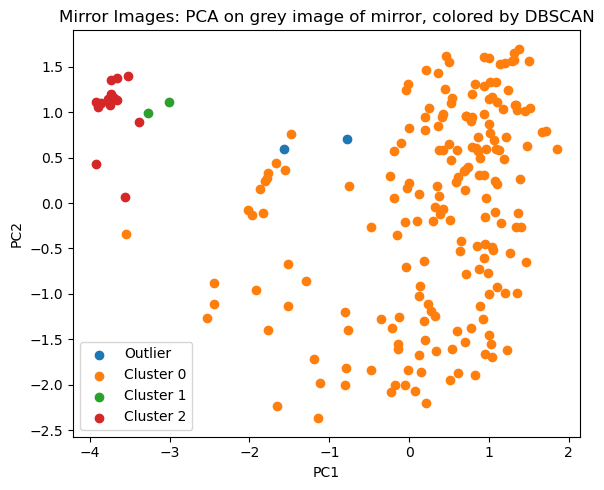

In [106]:
# 3. Reduce to 2D for plotting
pca = PCA(n_components=2)
proj = pca.fit_transform(feats)

# 2. Plot with legend
plt.figure(figsize=(6, 5))
unique_labels = np.unique(labels)

for label in unique_labels:
    idx = labels == label
    label_name = f"Cluster {label}" if label != -1 else "Outlier"
    plt.scatter(proj[idx, 0], proj[idx, 1], label=label_name)

plt.title("Mirror Images: PCA on grey image of mirror, colored by DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
MIRRORS_LIST = [f"mirror_{i}" for i in range(1, 289)]

H5_PATH = "../prepare_images/data/webcam_images.h5"

labels_by_mirror = {}
# Run test
for mirror in MIRRORS_LIST:
    #print(f"\nProcessing {mirror}...")
    labels, feats = process_images(
        h5file=H5_PATH,
        extractor_fn=raw_pixels,
        cluster_fn=lambda X: cluster_dbscan(X, eps=2.5, min_samples=2),
        mirror_id=mirror
    )
    labels_by_mirror[mirror] = labels
    #print(f"Unique clusters: {set(labels)}")

In [96]:
labels_by_mirror["mirror_25"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

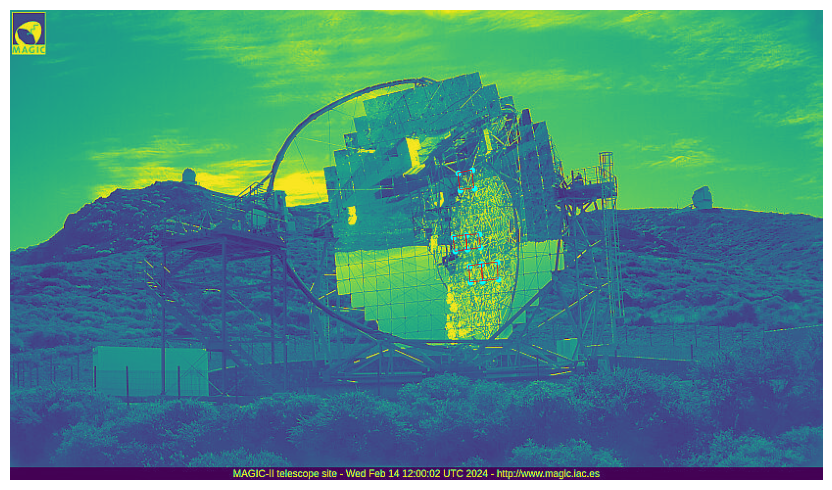

In [98]:
MIRRORS_LIST = [f"mirror_{i}" for i in range(1, 289)]

H5_PATH = "../prepare_images/data/webcam_images.h5"

event_id = 142
list_of_mirrors = []
# Run test
for mirror in MIRRORS_LIST:
    if labels_by_mirror[mirror][event_id] == -1:
        list_of_mirrors.append(int(mirror.split("_")[-1]))

f = h5py.File("../prepare_images/data/webcam_images.h5", "r")
keys = list(f["images"].keys())
add_box_around_mirror(f["images"][keys[event_id]]["image"][:], list_of_mirrors)
f.close()

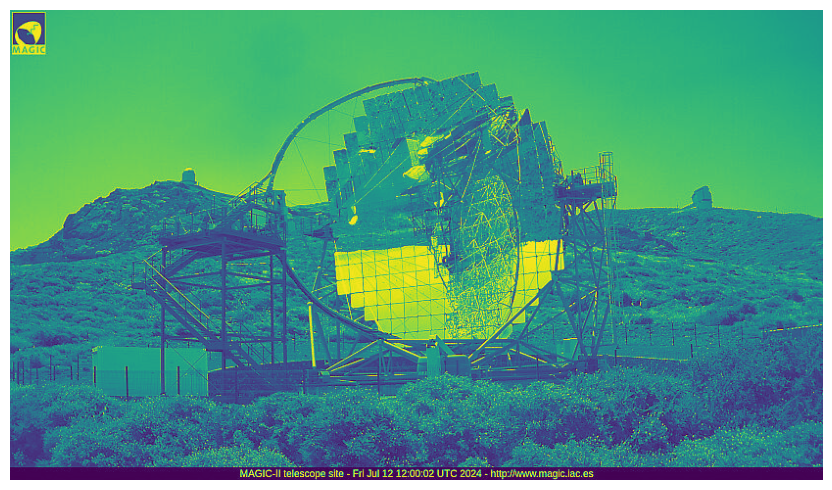

In [81]:
f = h5py.File("../prepare_images/data/webcam_images.h5", "r")
keys = list(f["images"].keys())
add_box_around_mirror(f["images"][keys[event_id]]["image"][:], list_of_mirrors)
f.close()

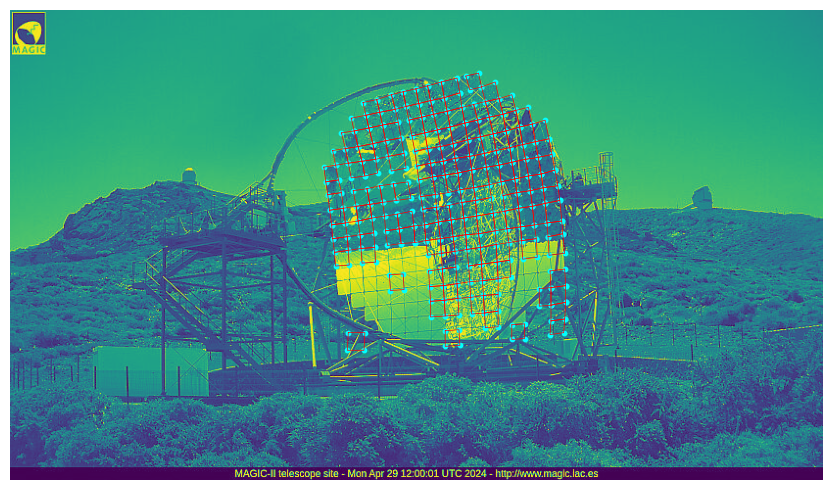

In [42]:
add_box_around_mirror(f["images"][keys[event_id]]["image"][:], list_of_mirrors)

In [ ]:
list_of_mirrors = []
event_id = 130
for key in labels_by_mirror.keys():
    label = labels_by_mirror[key][event_id]
    if label == -1:
        #print(key, label)
        list_of_mirrors.append(int(key.split("_")[-1]))
        
add_box_around_mirror(f["images"][keys[event_id]]["image"][:], list_of_mirrors)